# Heart Attack Risk Prediction

The dataset includes a wide range of features related to heart health and lifestyles. It covers individual details like age, gender, blood pressures, and BMI and also covers lifestyles choices like smoking, alcohol consumption, and sleep hours per day. The ultimate goal of this dataset and our applications is to predict the heart attack risk of a person. The features included and their respective brief details are following:
- Patient ID: Unique identifier for each patient
- Age: Age of the patient
- Sex: Gender of the patient (Male/Female)
- Cholesterol: Cholesterol levels of the patient
- Blood Pressure: Blood pressure of the patient (systolic/diastolic)
- Heart Rate: Heart rate of the patient
- Diabetes: Whether the patient has diabetes (Yes/No)
- Family History: Family history of heart-related problems (1: Yes, 0: No)
- Smoking: Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity: Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption: Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
- Exercise Hours Per Week: Number of exercise hours per week
- Diet: Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems: Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use: Medication usage by the patient (1: Yes, 0: No)
- Stress Level: Stress level reported by the patient (1-10)
- Sedentary Hours Per Day: Hours of sedentary activity per day
- Income: Income level of the patient
- BMI: Body Mass Index (BMI) of the patient
- Triglycerides: Triglyceride levels of the patient
- Physical Activity Days Per Week: Days of physical activity per week
- Sleep Hours Per Day: Hours of sleep per day
- Country: Country of the patient
- Continent: Continent where the patient resides
- Hemisphere: Hemisphere where the patient resides
- Heart Attack Risk: Presence of heart attack risk (1: Yes, 0: No)

The dataset is retrieved from https://www.kaggle.com/competitions/heart-attack-risk-analysis

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", mpl.__version__)
print("Seaborn Version:", sns.__version__)

Numpy Version: 1.26.0
Pandas Version: 2.1.1
Matplotlib Version: 3.8.0
Seaborn Version: 0.13.0


## Import Data

In [4]:
# The data is from the competition at https://www.kaggle.com/competitions/heart-attack-risk-analysis/data?select=train.csv

data = pd.read_csv('./dataset/Heart Attack Risk Analysis.csv')

### Get to know the data

In [5]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [6]:
# Data consists of 26 features (label included) and 7010 rows

data.shape

(7010, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [8]:
# There is no nan in data

data.isna().sum().sum()

0

#### The number of unique value in each column

In [9]:
print(f'Unique values in each column \n{"="*50}')

for c in data.columns:
    print(f'{c}: {data[c].unique().shape[0]}')

Unique values in each column 
Patient ID: 7010
Age: 73
Sex: 2
Cholesterol: 281
Blood Pressure: 3590
Heart Rate: 71
Diabetes: 2
Family History: 2
Smoking: 2
Obesity: 2
Alcohol Consumption: 2
Exercise Hours Per Week: 7010
Diet: 3
Previous Heart Problems: 2
Medication Use: 2
Stress Level: 10
Sedentary Hours Per Day: 7010
Income: 6921
BMI: 7010
Triglycerides: 771
Physical Activity Days Per Week: 8
Sleep Hours Per Day: 7
Country: 20
Continent: 6
Hemisphere: 2
Heart Attack Risk: 2


#### Categorize columns for easier encoding

This is how our data looks like. 

| Age | Sex | Cholesterol | Blood Pressure | Heart Rate | Diabetes | Family History | Smoking | Obesity | Alcohol Consu-mption | Exercise Hours Per Week | Diet | Previous Heart Problems | Medi-cation Use | Stress Level | Sedentary Hours Per Day | Income | BMI | Trigly-cerides | Physical Activity Days Per Week | Sleep Hours Per Day | Country | Continent | Hemi-sphere | Heart Attack Risk |
|-----|-----|-------------|----------------|------------|----------|-----------------|---------|---------|---------------------|-------------------------|------|-------------------------|-----------------|--------------|--------------------------|--------|-----|---------------|---------------------------------|----------------------|---------|-----------|------------|-------------------|
| int | binary | float | float | int | binary | binary | binary | binary | binary | float | ordinal (3) | binary | binary | ordinal (10) | float | float | float | int | int | int | cat (20) | cat(6) | binary | target (bi) |



## Train Test Split

In [10]:
X = data.drop('Heart Attack Risk', axis = 1)
y = data['Heart Attack Risk']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode Features

In [12]:
X_train['Sex'] = X_train['Sex'].map({'Male': 0, 'Female':1})
X_test['Sex'] = X_test['Sex'].map({'Male': 0, 'Female':1})

In [13]:
X_train['Diet'] = X_train['Diet'].map({'Unhealthy': 0, 'Average':1, 'Healthy':2})
X_test['Diet'] = X_test['Diet'].map({'Unhealthy': 0, 'Average':1, 'Healthy':2})

In [14]:
temp = X_train['Blood Pressure'].str.split('/', expand=True).add_prefix('Blood Pressure_').astype(int)
X_train = pd.concat([X_train, temp], axis=1)
temp = X_test['Blood Pressure'].str.split('/', expand=True).add_prefix('Blood Pressure_').astype(int)
X_test = pd.concat([X_test, temp], axis=1)

In [15]:
X_train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood Pressure_0,Blood Pressure_1
1323,GNF8635,76,1,189,139/66,77,1,0,1,1,...,35314,32.584910,229,2,4,Australia,Australia,Southern Hemisphere,139,66
5695,FQC8260,29,1,125,114/100,70,1,1,0,1,...,293350,20.880284,795,1,7,Vietnam,Asia,Northern Hemisphere,114,100
1897,QLK4251,51,1,359,152/74,85,1,1,1,1,...,113592,29.886262,785,1,10,New Zealand,Australia,Southern Hemisphere,152,74
6659,PYJ9096,85,0,339,154/78,92,1,0,1,1,...,283116,34.716623,38,1,10,India,Asia,Northern Hemisphere,154,78
1871,HVL7280,53,0,253,167/88,58,1,1,1,0,...,268558,36.484362,601,2,10,United Kingdom,Europe,Northern Hemisphere,167,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,EMG4617,69,0,132,128/92,60,0,0,1,1,...,161549,26.411480,69,0,7,United Kingdom,Europe,Northern Hemisphere,128,92
5191,PNO7326,32,0,200,167/110,74,1,0,1,1,...,297042,32.386166,486,1,5,Thailand,Asia,Northern Hemisphere,167,110
5226,YTY7090,59,0,202,96/75,105,1,0,1,1,...,102445,38.195547,448,1,10,China,Asia,Northern Hemisphere,96,75
5390,MFN5136,28,0,294,100/108,87,1,0,1,1,...,187450,18.368411,281,6,6,South Africa,Africa,Southern Hemisphere,100,108


In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
temp = ohe.fit_transform(X_train[['Country']])
temp

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
temp = pd.DataFrame(temp, columns=ohe.get_feature_names_out(), dtype=int)
temp = temp.set_index(X_train.index)
temp

,Country_Argentina,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam
1323,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1897,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6659,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5226,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
# Drop continent and hemisphere because it is redundant considering that we will include country names

X_train.drop(['Patient ID', 'Blood Pressure', 'Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)
X_train = pd.concat([X_train, temp], axis=1)
X_train

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam
1323,76,1,189,77,1,0,1,1,1,9.223411,...,0,0,0,0,0,0,0,0,0,0
5695,29,1,125,70,1,1,0,1,1,6.706053,...,0,0,0,0,0,0,0,0,0,1
1897,51,1,359,85,1,1,1,1,1,12.377296,...,0,1,0,0,0,0,0,0,0,0
6659,85,0,339,92,1,0,1,1,0,18.232745,...,0,0,0,0,0,0,0,0,0,0
1871,53,0,253,58,1,1,1,0,1,12.931173,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,69,0,132,60,0,0,1,1,1,10.275870,...,0,0,0,0,0,0,0,1,0,0
5191,32,0,200,74,1,0,1,1,0,3.091722,...,0,0,0,0,0,0,1,0,0,0
5226,59,0,202,105,1,0,1,1,0,19.956987,...,0,0,0,0,0,0,0,0,0,0
5390,28,0,294,87,1,0,1,1,0,4.782827,...,0,0,0,1,0,0,0,0,0,0


In [19]:
temp = ohe.transform(X_test[['Country']])
temp = pd.DataFrame(temp, columns=ohe.get_feature_names_out(), dtype=int)
temp = temp.set_index(X_test.index)
X_test.drop(['Patient ID', 'Blood Pressure', 'Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)
X_test = pd.concat([X_test, temp], axis=1)

## Model Training

<Axes: xlabel='Heart Attack Risk'>

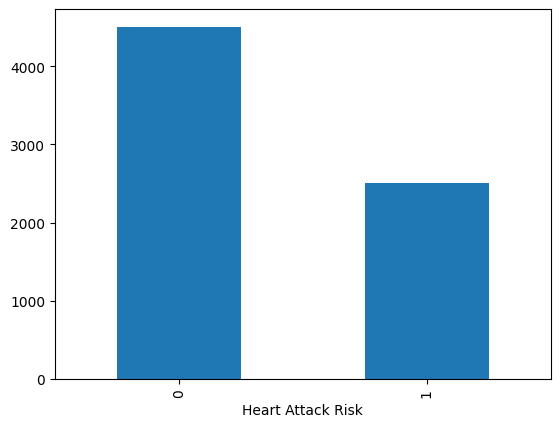

In [20]:
data['Heart Attack Risk'].value_counts().plot.bar()

In [21]:
# First off, we will get a preliminary result with no model selection and hyperparameter tuning.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# model = RandomForestClassifier()
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
cross_val = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation f1 scores:", cross_val) 

Cross-validation f1 scores: [0.56862745 0.5802139  0.55525847 0.57627119 0.57716325]


Text(50.722222222222214, 0.5, 'True')

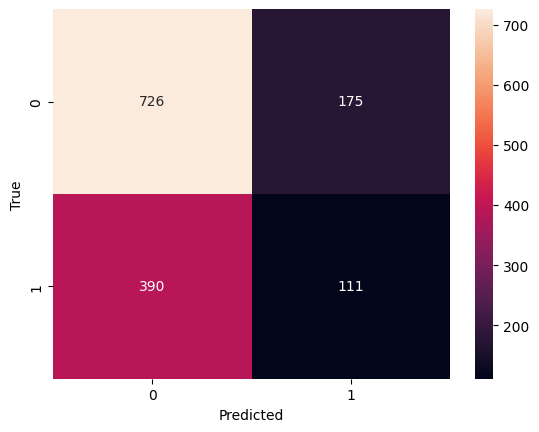

In [22]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# model = RandomForestClassifier()
model = xgb.XGBClassifier()
model.fit(X_resampled, y_resampled)
cross_val = cross_val_score(model, X_resampled, y_resampled, cv=5)

print("Cross-validation f1 scores:", cross_val) 

Cross-validation f1 scores: [0.49625935 0.48064919 0.50436954 0.51186017 0.48064919]


Text(50.722222222222214, 0.5, 'True')

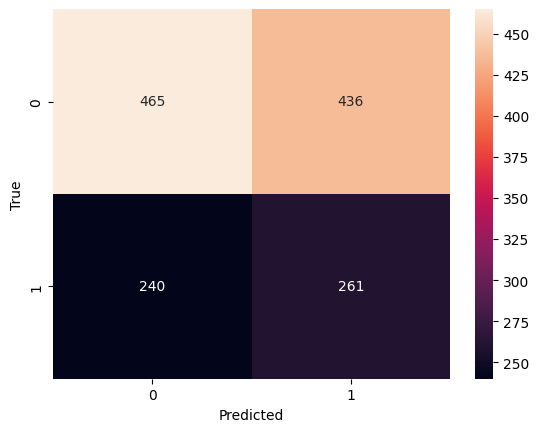

In [25]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')

# Replace Country with Its Statistics

In [184]:
country = data[['Country']]
country

,Country
0,Argentina
1,Nigeria
2,Thailand
3,Spain
4,Germany
...,...
7005,France
7006,United Kingdom
7007,Colombia
7008,Spain


In [204]:
data = pd.read_csv('./dataset/Heart Attack Risk Analysis.csv')
coun_cardiac = pd.read_csv('./dataset/cardiovascular-disease-death-rates.csv')
coun_gdp = pd.read_csv('./dataset/GDP.csv')
coun_index = pd.read_csv('./dataset/legatum prosperity health index.csv')

In [205]:
coun_cardiac.head()

,Entity,Code,Year,Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,716.27
1,Afghanistan,AFG,1991,711.20
2,Afghanistan,AFG,1992,708.28
3,Afghanistan,AFG,1993,712.87
4,Afghanistan,AFG,1994,720.74


In [206]:
coun_cardiac = coun_cardiac[coun_cardiac['Year'] == 2017]

In [207]:
coun_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [208]:
coun_index.head()

,Unnamed: 0,country,health_index
0,0,Singapore,86.89
1,1,Japan,86.50
2,2,South Korea,84.80
3,3,"Taiwan, China",83.37
4,4,China,83.11


In [209]:
for c in country['Country'].unique():
    if c not in coun_cardiac['Entity'].unique():
        print('coun_cardiac does not have "' + c + '"')
    if c not in coun_gdp['Country '].unique():
        print('coun_gdp does not have "' + c + '"')
    if c not in coun_index['country'].unique():
        print('coun_index does not have "' + c + '"')

coun_gdp does not have "South Korea"


In [210]:
coun_gdp[coun_gdp['Country Code'] == 'KOR']

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
120,"Korea, Rep.",KOR,8273.406045,9345.822855,10044.19063,10875.12437,12008.47377,13299.16144,14433.0009,15406.22038,...,30365.27837,31228.5107,32097.164,32615.77259,33587.5834,35760.73444,37142.8329,38824.11539,40111.77576,NaN


In [211]:
coun_gdp['Country '] = coun_gdp['Country '].replace({'Korea, Rep.': 'South Korea'})

In [212]:
coun_gdp[coun_gdp['Country Code'] == 'KOR']

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
120,South Korea,KOR,8273.406045,9345.822855,10044.19063,10875.12437,12008.47377,13299.16144,14433.0009,15406.22038,...,30365.27837,31228.5107,32097.164,32615.77259,33587.5834,35760.73444,37142.8329,38824.11539,40111.77576,NaN


In [213]:
data = data.merge(coun_index[['country', 'health_index']], how='left', left_on='Country', right_on='country')

In [214]:
data = data.merge(coun_gdp[['Country ', '2018']], how='left', left_on='Country', right_on='Country ')

In [215]:
data = data.merge(coun_cardiac[['Entity', 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)']], how='left', left_on='Country', right_on='Entity')

In [216]:
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Country,Continent,Hemisphere,Heart Attack Risk,country,health_index,Country,2018,Entity,Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,Argentina,South America,Southern Hemisphere,1,Argentina,74.45,Argentina,20610.568550,Argentina,190.14
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,Nigeria,Africa,Northern Hemisphere,1,Nigeria,50.12,Nigeria,5990.850432,Nigeria,241.54
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,Thailand,Asia,Northern Hemisphere,0,Thailand,78.92,Thailand,19051.333380,Thailand,118.67
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,Spain,Europe,Southern Hemisphere,1,Spain,79.66,Spain,39715.439060,Spain,106.88
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,Germany,Europe,Northern Hemisphere,1,Germany,81.41,Germany,53074.540120,Germany,161.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,France,Europe,Northern Hemisphere,0,France,80.46,France,45342.395740,France,91.33
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,United Kingdom,Europe,Northern Hemisphere,0,United Kingdom,78.31,United Kingdom,45973.573500,United Kingdom,129.12
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,Colombia,South America,Northern Hemisphere,0,Colombia,77.78,Colombia,15012.930270,Colombia,132.62
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,Spain,Europe,Southern Hemisphere,1,Spain,79.66,Spain,39715.439060,Spain,106.88


In [217]:
data['Health Index'] = data['health_index']
data['GDP (2018)'] = data['2018']
data['Death Rate'] = data['Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)']
data.drop(['Country', 'Hemisphere', 'Country ', 'country', 'health_index', '2018', 'Entity', 'Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)'], axis=1, inplace=True)

In [218]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Health Index,GDP (2018),Death Rate
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,184066,30.449815,63,6,7,South America,1,74.45,20610.568550,190.14
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,211755,34.973685,333,7,8,Africa,1,50.12,5990.850432,241.54
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,252203,30.554246,537,2,10,Asia,0,78.92,19051.333380,118.67
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,121954,35.390265,591,0,9,Europe,1,79.66,39715.439060,106.88
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,180121,39.575483,145,2,5,Europe,1,81.41,53074.540120,161.49


In [ ]:
data.to_csv('./dataset/merged 001.csv')

## Train Test Split

In [219]:
X = data.drop('Heart Attack Risk', axis = 1)
y = data['Heart Attack Risk']

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode Features

In [221]:
X_train['Sex'] = X_train['Sex'].map({'Male': 0, 'Female':1})
X_test['Sex'] = X_test['Sex'].map({'Male': 0, 'Female':1})

In [222]:
X_train['Diet'] = X_train['Diet'].map({'Unhealthy': 0, 'Average':1, 'Healthy':2})
X_test['Diet'] = X_test['Diet'].map({'Unhealthy': 0, 'Average':1, 'Healthy':2})

In [223]:
temp = X_train['Blood Pressure'].str.split('/', expand=True).add_prefix('Blood Pressure_').astype(int)
X_train = pd.concat([X_train, temp], axis=1)
temp = X_test['Blood Pressure'].str.split('/', expand=True).add_prefix('Blood Pressure_').astype(int)
X_test = pd.concat([X_test, temp], axis=1)

In [224]:
X_train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Health Index,GDP (2018),Death Rate,Blood Pressure_0,Blood Pressure_1
1323,GNF8635,76,1,189,139/66,77,1,0,1,1,...,32.584910,229,2,4,Australia,80.36,51663.365090,106.37,139,66
5695,FQC8260,29,1,125,114/100,70,1,1,0,1,...,20.880284,795,1,7,Asia,76.99,7447.814334,311.24,114,100
1897,QLK4251,51,1,359,152/74,85,1,1,1,1,...,29.886262,785,1,10,Australia,79.84,41005.420870,134.29,152,74
6659,PYJ9096,85,0,339,154/78,92,1,0,1,1,...,34.716623,38,1,10,Asia,66.16,7762.881770,255.26,154,78
1871,HVL7280,53,0,253,167/88,58,1,1,1,0,...,36.484362,601,2,10,Europe,78.31,45973.573500,129.12,167,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,EMG4617,69,0,132,128/92,60,0,0,1,1,...,26.411480,69,0,7,Europe,78.31,45973.573500,129.12,128,92
5191,PNO7326,32,0,200,167/110,74,1,0,1,1,...,32.386166,486,1,5,Asia,78.92,19051.333380,118.67,167,110
5226,YTY7090,59,0,202,96/75,105,1,0,1,1,...,38.195547,448,1,10,Asia,83.11,18236.612980,286.84,96,75
5390,MFN5136,28,0,294,100/108,87,1,0,1,1,...,18.368411,281,6,6,Africa,59.90,13686.882360,251.41,100,108


In [225]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
temp = ohe.fit_transform(X_train[['Continent']])
temp

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [226]:
temp = pd.DataFrame(temp, columns=ohe.get_feature_names_out(), dtype=int)
temp = temp.set_index(X_train.index)
temp

,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
1323,0,0,1,0,0,0
5695,0,1,0,0,0,0
1897,0,0,1,0,0,0
6659,0,1,0,0,0,0
1871,0,0,0,1,0,0
...,...,...,...,...,...,...
3772,0,0,0,1,0,0
5191,0,1,0,0,0,0
5226,0,1,0,0,0,0
5390,1,0,0,0,0,0


In [227]:
# Drop continent and hemisphere because it is redundant considering that we will include country names

X_train.drop(['Patient ID', 'Blood Pressure', 'Continent'], axis=1, inplace=True)
X_train = pd.concat([X_train, temp], axis=1)
X_train

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,GDP (2018),Death Rate,Blood Pressure_0,Blood Pressure_1,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
1323,76,1,189,77,1,0,1,1,1,9.223411,...,51663.365090,106.37,139,66,0,0,1,0,0,0
5695,29,1,125,70,1,1,0,1,1,6.706053,...,7447.814334,311.24,114,100,0,1,0,0,0,0
1897,51,1,359,85,1,1,1,1,1,12.377296,...,41005.420870,134.29,152,74,0,0,1,0,0,0
6659,85,0,339,92,1,0,1,1,0,18.232745,...,7762.881770,255.26,154,78,0,1,0,0,0,0
1871,53,0,253,58,1,1,1,0,1,12.931173,...,45973.573500,129.12,167,88,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,69,0,132,60,0,0,1,1,1,10.275870,...,45973.573500,129.12,128,92,0,0,0,1,0,0
5191,32,0,200,74,1,0,1,1,0,3.091722,...,19051.333380,118.67,167,110,0,1,0,0,0,0
5226,59,0,202,105,1,0,1,1,0,19.956987,...,18236.612980,286.84,96,75,0,1,0,0,0,0
5390,28,0,294,87,1,0,1,1,0,4.782827,...,13686.882360,251.41,100,108,1,0,0,0,0,0


In [228]:
temp = ohe.transform(X_test[['Continent']])
temp = pd.DataFrame(temp, columns=ohe.get_feature_names_out(), dtype=int)
temp = temp.set_index(X_test.index)
X_test.drop(['Patient ID', 'Blood Pressure', 'Continent'], axis=1, inplace=True)
X_test = pd.concat([X_test, temp], axis=1)

In [229]:
X_train.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 5608 entries, 1323 to 860
Empty DataFrame


## Model Training

<Axes: xlabel='Heart Attack Risk'>

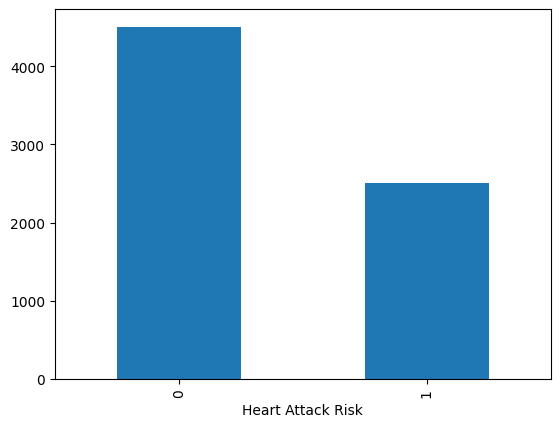

In [230]:
data['Heart Attack Risk'].value_counts().plot.bar()

In [231]:
# First off, we will get a preliminary result with no model selection and hyperparameter tuning.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# model = RandomForestClassifier()
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
cross_val = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation f1 scores:", cross_val) 

Cross-validation f1 scores: [0.57130125 0.58110517 0.57040998 0.56110616 0.573595  ]


Text(50.722222222222214, 0.5, 'True')

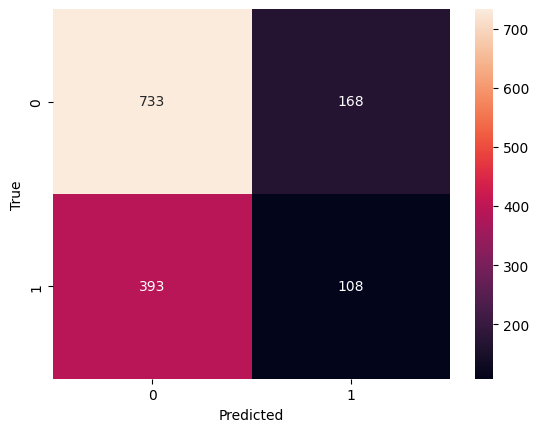

In [232]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')

In [233]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# model = RandomForestClassifier()
model = xgb.XGBClassifier()
model.fit(X_resampled, y_resampled)
cross_val = cross_val_score(model, X_resampled, y_resampled, cv=5)

print("Cross-validation f1 scores:", cross_val) 

Cross-validation f1 scores: [0.48628429 0.49188514 0.51935081 0.48813983 0.48189763]


Text(50.722222222222214, 0.5, 'True')

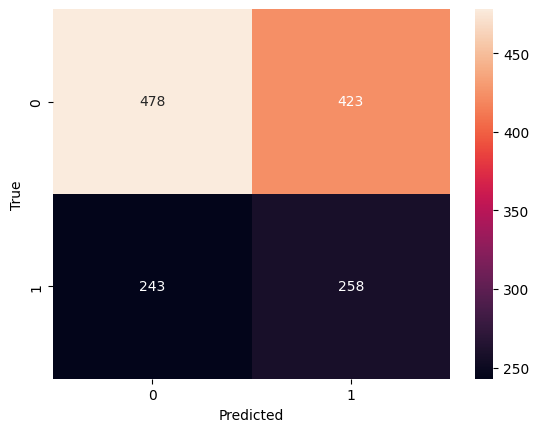

In [235]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.feature_selection import 